In [1]:
import numpy as np
import math


In [2]:
import climetlab as cml

s = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2012-12-12",
    time="12",
)


In [3]:
def generate(shape, ref=273.15, offset1=0, offset2=0):
    f = np.zeros(shape=s[0].shape, dtype=np.float64)

    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            f[i, j] = (
                ref
                + (math.sin((i + offset1) / 45.0) + math.sin((j + offset2) / 90.0)) * 15
            )

    return f


In [4]:
f = generate(s[0].shape)


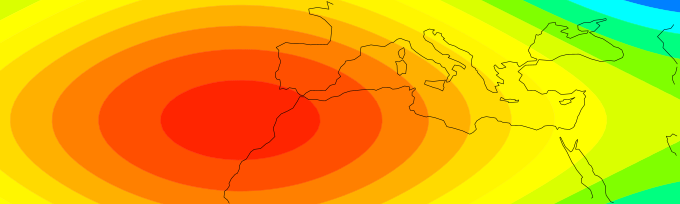

In [5]:
cml.plot_map(f, metadata=s[0])


In [6]:
output = cml.new_grib_output("test1.grib", template=s[0])
output.write(f)
output.close()


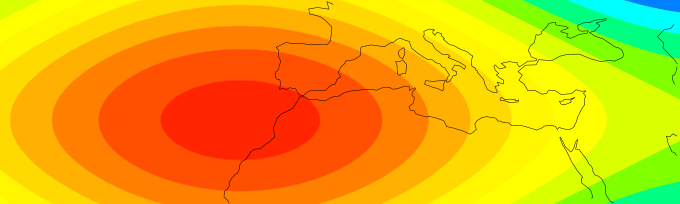

In [7]:
cml.plot_map(cml.load_source("file", "test1.grib"))


In [8]:
output = cml.new_grib_output("test2.grib")
output.write(f, template=s[0])
output.close()


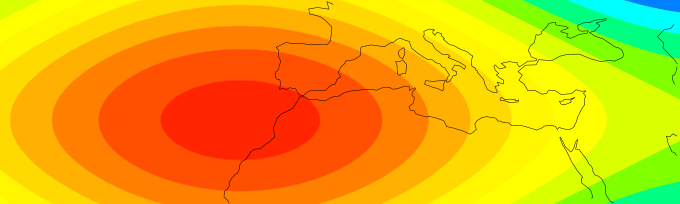

In [9]:
cml.plot_map(cml.load_source("file", "test2.grib"))


In [10]:
with cml.new_grib_output("test3.grib", template=s[0]) as output:
    output.write(f)


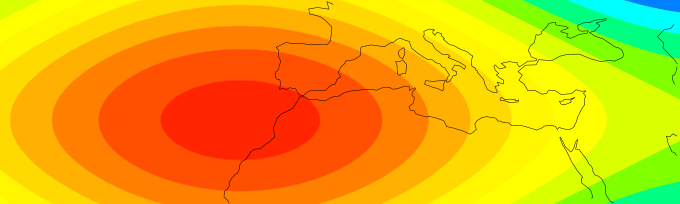

In [11]:
cml.plot_map(cml.load_source("file", "test3.grib"))


In [12]:
with cml.new_grib_output("test4.grib", template=s[0]) as output:
    for i in range(24):
        f = generate(s[0], offset1=i, offset2=i)
        output.write(f, metadata={"time": i})


In [13]:
test4 = cml.load_source("file", "test4.grib")

p = cml.new_plot(animate=True, fps=5)
for f in test4:
    p.plot_map(f)

p.show()
